In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as scs

In [13]:
#Reading data
df =pd.read_csv('data/AdSmartABdata.csv')

In [14]:
# Filter out users that were not interacting
relevant_rows = df.query('yes == 1 | no == 1')

In [15]:
exposed = relevant_rows.query('experiment == "exposed"')
control = relevant_rows.query('experiment == "control"')

# Calculate a number of observation in both groups
print('The exposed group dataframe has {} observations'. format(exposed.shape[0]))
print('The control group dataframe has {} observations'. format(control.shape[0]))

contr_d1 = '{0:.2f}%'.format(exposed.yes.mean()*100)
trtm_d1 = '{0:.2f}%'.format(control.yes.mean()*100)
print('The conversion rate in the exposed group is equal to {}'.format(contr_d1))
print('The conversion rate in the exposed group is equal to {}'.format(trtm_d1))

The exposed group dataframe has 657 observations
The control group dataframe has 586 observations
The conversion rate in the exposed group is equal to 46.88%
The conversion rate in the exposed group is equal to 45.05%


In [16]:
# Filter out users that were not interacting
temp_df = df.query("not (yes == 0 & no == 0)")
temp_df.shape

(1243, 9)

Only 1243 users out of 8077 responded to the questionaire. So we will drop users who haven't responded.

In [17]:
clean_df = temp_df[['auction_id', 'experiment', 'yes', 'no']]
clean_df['aware'] = 0
clean_df.loc[clean_df['yes'] == 1, 'aware'] = 1
clean_df.loc[clean_df['yes'] == 0, 'aware'] = 0
clean_df.drop(columns=['yes', 'no'], inplace=True)
clean_df = clean_df.set_index('auction_id')
clean_df

/tmp/ipykernel_7902/2611879631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['aware'] = 0
/home/ermi/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/ermi/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,experiment,aware
auction_id,,
0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,0
008aafdf-deef-4482-8fec-d98e3da054da,exposed,1
00a1384a-5118-4d1b-925b-6cdada50318d,exposed,0
00b6fadb-10bd-49e3-a778-290da82f7a8d,control,1
00ebf4a8-060f-4b99-93ac-c62724399483,control,0
...,...,...
ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,1
ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,1
ffb79718-6f25-4896-b6b3-e58b80a6e147,control,0


The aware column indicates whether a user is aware of the brand or not with a 1 or 0, respectively.

In [18]:
summary = clean_df.pivot_table(values='aware', index='experiment', aggfunc=np.sum)
# add additional columns to the pivot table
summary['total'] = clean_df.pivot_table(values='aware', index='experiment', aggfunc=lambda x: len(x))
summary['rate'] = clean_df.pivot_table(values='aware', index='experiment')
summary

,aware,total,rate
experiment,,,
control,264,586,0.450512
exposed,308,657,0.468798


In [19]:
summary_df = clean_df.pivot_table( index='experiment', aggfunc='sum')
summary_df['total'] = clean_df.pivot_table( index='experiment', aggfunc='count')
summary_df['rate'] = clean_df.pivot_table( index='experiment')
summary_df['not aware'] = summary_df['total'] - summary_df['aware']
summary_df = summary_df.reindex(['aware', 'not aware', 'total', 'rate'], axis=1)
summary_df

,aware,not aware,total,rate
experiment,,,,
control,264,322,586,0.450512
exposed,308,349,657,0.468798


The sample sizes of the exposed group and control group are 657 and 586 respectively
The number of conversions in the exposed group and control group is 308 and 264 respectively

# Formulation of Null and Alternative Hypothesis

Here I will be formulating a null and an alternative hypothesis. The null hypothesis will state that there are no changes in conversion either with the new creative ad or with the dummy ad. The alternative hypothesis is what we wanted to confirm, ie the conversion rate is higher with the new creative ad than with the dummy one.

In [10]:
# Sampling distribution under the null

obs_diff = exposed.yes.mean() - control.yes.mean()
obs_diff_form = '{0:.2f}%'.format(obs_diff*100)
print('The observed difference in the conversion rate between the exposed and the control group is {}'.format(obs_diff_form))

The observed difference in the conversion rate between the exposed and the control group is 1.83%


In [26]:
#storing number of conversions for exposed and control groups as numpy arrays
count = np.array([exposed_converted.shape[0], control_converted.shape[0]])
#storing sample sizes of exposed and control group as numpy arrays
nobs = np.array([exposed.shape[0], control.shape[0]])
#storing results of z test in variables
stat, p_val = proportions_ztest(count, nobs, alternative = 'larger')
p_form = '{0:.2f}%'.format(p_val*100)
print('P-value is equal to {}'.format(p_form))

NameError: name 'exposed_converted' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(-49, A_converted+50, 100)
yA = scs.binom(A_total, p_A).pmf(xA)
ax.bar(xA, yA, alpha=0.5)
xB = np.linspace(B_converted-49, B_converted+50, 100)
yB = scs.binom(B_total, p_B).pmf(xB)
ax.bar(xB, yB, alpha=0.5)
plt.xlabel('converted')
plt.ylabel('probability')

In [53]:
exp_rate = summary_df['rate']['exposed']
cont_rate = summary_df['rate']['control']
exp_aware = summary_df['aware']['exposed']
cont_aware = summary_df['aware']['control']
exp_total = summary_df['total']['exposed']
cont_total = summary_df['total']['control']
diff = exp_rate - cont_rate

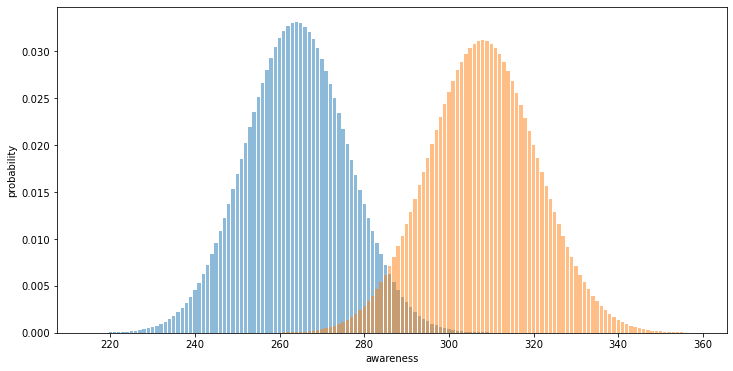

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))

xC = np.linspace(cont_aware - 49, cont_aware + 50, 100)
yC = scs.binom(cont_total, cont_rate).pmf(xC)
ax.bar(xC, yC, alpha=0.5, linestyle='--')
xE = np.linspace(exp_aware - 49, exp_aware + 50, 100)
yE = scs.binom(exp_total , exp_rate).pmf(xE)
ax.bar(xE, yE, alpha=0.5, linestyle='--')
plt.xlabel('awareness')
plt.ylabel('probability')
plt.show()

In [57]:
clean_df.describe()

,aware
count,1243.000000
mean,0.460177
std,0.498612
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [58]:
df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0
